In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import model_from_json
from keras.models import Sequential
from keras.preprocessing.image import img_to_array, load_img
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers.core import Dense,Activation,Dropout,Flatten
from keras.utils import np_utils
%matplotlib inline

#------------変数宣言------------
img_size = 64
#csvのファイルパスを記載
csv_filepath = 'filename.csv'
#水増し処理の種類を記載
img_add = 9
#------------処理ここから------------

#csvからファイルパスを読み込む
csv_file = pd.read_csv(csv_filepath, encoding="UTF-8")#もしくわUTF-8

#csvに記載しているファイルパス、ラベル、総数を格納
fnames = csv_file['filepath']
labels = csv_file['label']
fnames_total = len(fnames)

#データセットを格納する変数の初期化
img_train = np.zeros((fnames_total,img_size,img_size,3))

#データセットの格納
#前処理する場合はここでやる
for i,fname in enumerate(fnames):
    #解像度を変えて、画像を読み込む
    temp_img = load_img(fname, target_size=(img_size,img_size))

    #画像を配列に変換し0-1で正規化
    img_train[i] = img_to_array(temp_img)
    
#正解ラベルをOne-Hot表現に変換
label_train = np_utils.to_categorical(labels,10)

792
502
303
22
591
428
376
551
796


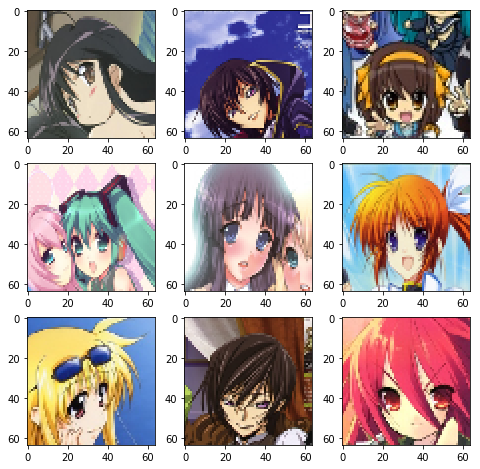

In [96]:
#ちゃんと読み込まれたか確認する
#画像をランダムに表示
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3,3,i+1)
    j = np.random.randint(fnames_total)
    print(j)
    plt.imshow(img_train[j]/255)

In [97]:
#水増し処理を行う
#ImageDataGeneratorの生成
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
#    rescale=1. / 255,    #正規化
    rotation_range=180,    #回転
    vertical_flip=True,    #上下#反転
    horizontal_flip=True,    #左右反転
    brightness_range=[0.3, 1.0]    #明度調整 0だと暗く、1だと明るい
)
#ImageDataGeneratorを通す
gen = datagen.flow(img_train, batch_size=fnames_total)

In [98]:
print(img_train.shape)
print(batches.shape)
for i in range(img_add):
    batches = next(gen)  # (NumBatches, Height, Width, Channels) の4次元データを返す。
    img_train = np.vstack((img_train, batches))
print(img_train.shape)
#正規化する
img_train = img_train/255

(946, 64, 64, 3)
(10, 64, 64, 3)
(9460, 64, 64, 3)


1948
2465
6938
3379
4630
8231
1187
6229
6624
9438
1938
7575
5245
3370
5240
7790
8429
2980
1996
2970
2798
7559
5380
7701
1702
3644
7147
4533
455
4608
2305
5068
6466
6651
5582
9082


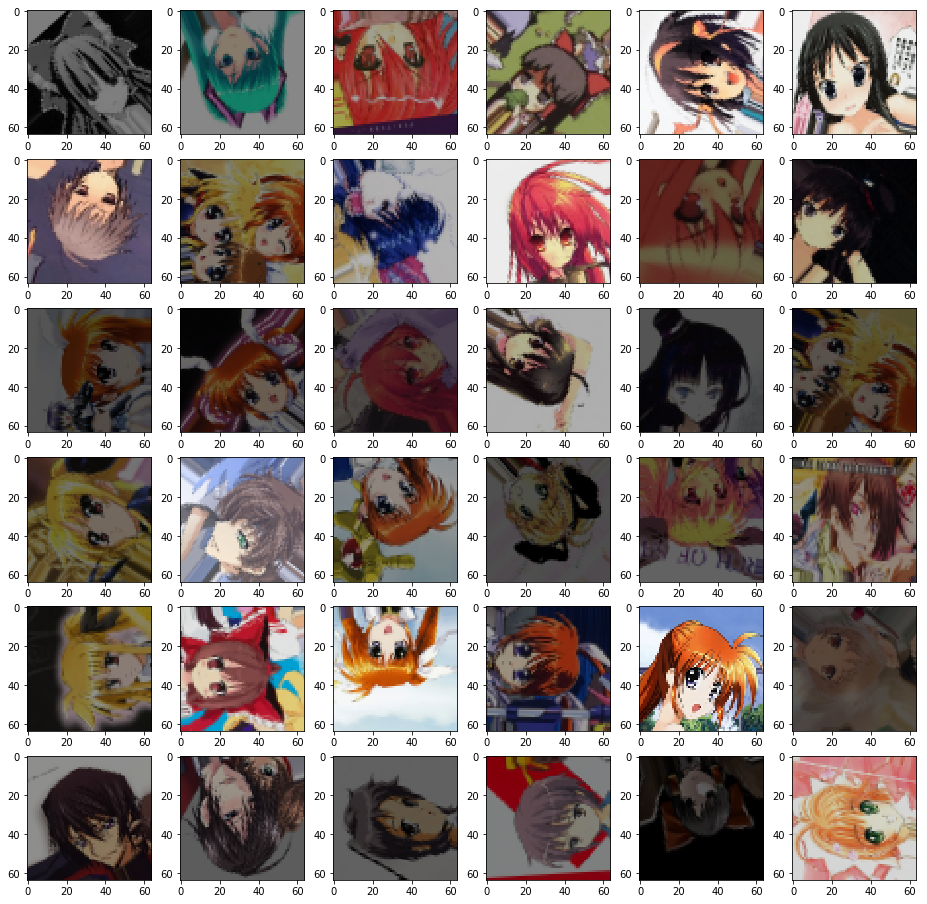

In [99]:
#ちゃんと読み込まれたか確認する
#画像をランダムに表示
plt.figure(figsize=(16, 16))
for i in range(36):
    plt.subplot(6,6,i+1)
    j = np.random.randint(fnames_total*(1+img_add))
    print(j)
    plt.imshow(img_train[j])

In [2]:
#モデルを構築
model=Sequential()

model.add(Conv2D(32,(3,3),padding='same',input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history=model.fit(img_train,label_train,batch_size=128,nb_epoch=20,verbose=1,validation_split=0.1)

#モデルと重みを保存
json_string=model.to_json()
open('Anime_cnn.json',"w").write(json_string)
model.save_weights('Anime_cnn.h5')

#モデルの表示
model.summary()


C:\Users\calut\Anaconda3\envs\aidemy\lib\site-packages\ipykernel_launcher.py:26: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 851 samples, validate on 95 samples
Epoch 1/20
851/851 [==============================] - 12s 14ms/step - loss: 2.2715 - acc: 0.1398 - val_loss: 2.8448 - val_acc: 0.0000e+00
Epoch 2/20
851/851 [==============================] - 12s 14ms/step - loss: 2.1156 - acc: 0.1563 - val_loss: 4.5520 - val_acc: 0.0000e+00
Epoch 3/20
851/851 [==============================] - 12s 14ms/step - loss: 1.7846 - acc: 0.3208 - val_loss: 6.8953 - val_acc: 0.0000e+00
Epoch 4/20
851/851 [==============================] - 12s 14ms/step - loss: 1.5315 - acc: 0.4559 - val_loss: 6.1028 - val_acc: 0.0000e+00
Epoch 5/20
851/851 [==============================] - 11s 12ms/step - loss: 1.3411 - acc: 0.4994 - val_loss: 5.9289 - val_acc: 0.0000e+00
Epoch 6/20
851/851 [==============================] - 12s 14ms/step - loss: 1.0792 - acc: 0.6228 - val_loss: 7.1516 - val_acc: 0.0000e+00
Epoch 7/20
851/851 [==============================] - 12s 14ms/step - loss: 0.8759 - acc: 0.6933 - val_loss: 8.0348 - val_acc: 